In [44]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix 

wine_data=pd.read_csv('wine_sales_data.csv', sep=',')
#wine_data=wine_data[np.isnan(wine_data['price'])==False]

In [84]:
vinho_verde=wine_data[(wine_data['country']=='Portugal') & (wine_data['province']=='Vinho Verde') & (np.isnan(wine_data['price'])==False)]
vv_all=wine_data[(wine_data['country']=='Portugal') & (wine_data['province']=='Vinho Verde')]
vv_all.shape
#Only Vinho Verde (with given price entry)

(396, 11)

In [3]:
vv_cut=(vinho_verde.sort_values('price')).iloc[31:279,:]
#Eliminate the top and botton 10% as outliers

In [4]:
vv_cut.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
140221,140221,Portugal,"This relatively dry style is crisp, fresh and ...",Lagosta,85,7.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Dom Teodosio
139930,139930,Portugal,"A low-alcohol (9.5%), apéritif style of Vinho ...",Famega,85,7.0,Vinho Verde,NaN,NaN,Portuguese White,Caves da Cerca
82073,82073,Portugal,"A medium-dry Vinho Verde, this is light and fr...",Aliança,85,7.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Aliança
128333,128333,Portugal,"A medium-dry Vinho Verde, this is light and fr...",Aliança,85,7.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Aliança
74645,74645,Portugal,"This fruity selection has light fizz and soft,...",Xadrez,84,7.0,Vinho Verde,NaN,NaN,Portuguese White,Dão Sul


In [5]:
vv_low=vv_cut[vv_cut['points']<85]
vv_med=vv_cut[(vv_cut['points']>84) & (vv_cut['points'] <88)]
vv_high=vv_cut[vv_cut['points']>87]
#Vinho Verde is in average quite low-quality, almost none of them rated over 90

In [6]:
vv_cut['winery'].nunique()
#47 wineries and >100 designations are too many to do an analysis, however we have 10 varieties.

47

In [21]:
(vv_cut.groupby('variety')).count()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,winery,IsAlv,IsLou,IsWhite,IsRose
variety,,,,,,,,,,,,,,
Alvarinho,22,22,22,14,22,22,22,0,0,22,22,22,22,22
Arinto,1,1,1,1,1,1,1,0,0,1,1,1,1,1
Avesso,3,3,3,1,3,3,3,0,0,3,3,3,3,3
Azal,1,1,1,1,1,1,1,0,0,1,1,1,1,1
Loureiro,24,24,24,14,24,24,24,0,0,24,24,24,24,24
Portuguese Red,4,4,4,2,4,4,4,0,0,4,4,4,4,4
Portuguese Rosé,1,1,1,1,1,1,1,0,0,1,1,1,1,1
Portuguese White,164,164,164,131,164,164,164,0,0,164,164,164,164,164
Rosé,27,27,27,17,27,27,27,0,0,27,27,27,27,27


In [20]:
vv_cut['IsAlv']= vv_cut['variety'].apply(lambda value: 1
if value == 'Alvarinho' else 0)
vv_cut['IsLou']= vv_cut['variety'].apply(lambda value: 1
if value == 'Loureiro' else 0)
vv_cut['IsWhite']= vv_cut['variety'].apply(lambda value: 1
if value == 'Portuguese White' else 0)
vv_cut['IsRose']= vv_cut['variety'].apply(lambda value: 1
if (value == 'Rosé' or value=='Portuguese Rosé') else 0)
# I will ignore the winery indications for now since there are a lot of wineries and probably highly correlated to wine type.
#Useful to predict price: rating, wine type.

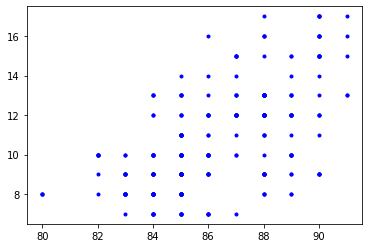

In [9]:
plt.plot(vv_cut['points'], vv_cut['price'], 'b.')
plt.show()

In [25]:
vv_cut = vv_cut.sample(frac=1, random_state=42).reset_index(drop=True)
sc=StandardScaler()
vv_cut['points']=sc.fit_transform((vv_cut['points']).values.reshape(-1,1))
X=np.c_[(vv_cut.iloc[:,-4:], vv_cut['points'])]
y=vv_cut['price']
#Ready for regression

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [35]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(Xtrain,ytrain)
print(regressor.coef_, regressor.intercept_)
print(regressor.score(Xtest,ytest))
Xtrain = np.append (arr=np.ones([Xtrain.shape[0],1]).astype(int), values = Xtrain, axis = 1)
Xtest = np.append (arr=np.ones([Xtest.shape[0],1]).astype(int), values = Xtest, axis = 1)
import statsmodels.api as sm
X_opt = [0,1,2,3,4,5]
regressor = sm.OLS(ytrain, Xtrain[:,X_opt]).fit()
print(regressor.summary())
#Result of OLS: higher quality implies higher price; "Loureiro" and "Portuguese White" wine is generally cheaper; no statistical significance for the other two categories

[-0.17003368 -1.23992915 -2.45615129 -0.79806017  1.61625318] 12.78240361610418
0.2993683211683207
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     38.20
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           1.33e-26
Time:                        10:41:04   Log-Likelihood:                -374.66
No. Observations:                 186   AIC:                             761.3
Df Residuals:                     180   BIC:                             780.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [13]:
X

array([[ 0.        ,  0.        ,  1.        ,  0.        , -0.55095272],
       [ 0.        ,  0.        ,  1.        ,  0.        , -0.97137203],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.7103052 ],
       ...,
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.7103052 ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.28988589],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.28988589]])

In [37]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)
#print(X_poly)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2)
#regressor=LinearRegression()
#regressor.fit(X_train,y_train)
#print(regressor.score(X_test,y_test))
#X_train = np.append (arr=np.ones([X_train.shape[0],1]).astype(int), values = X_train, axis = 1)
X_opt = [0,5,20] #Is... plus quality and quality^2
regressor = sm.OLS(y_train, X_train[:,X_opt]).fit()
print(regressor.summary())
#print(X_opt)
#Same insights as with linear regression. Slight upwards quadratic trend in prices, only statistically significant when the wine variety variables are taken away.


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     55.54
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           8.12e-20
Time:                        11:29:51   Log-Likelihood:                -417.97
No. Observations:                 198   AIC:                             841.9
Df Residuals:                     195   BIC:                             851.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5110      0.191     55.092      0.0

In [15]:
X_train[1,:]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
       -0.55095272,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  1.        , -0.55095272,
        0.3035489 ])

In [17]:
#NLP for the wine reviews. First full database:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(137235):
    try:
        review = re.sub('[^a-zA-Z]', ' ', wine_data.iloc[i]['description'])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    except:
        print(i)
    

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
XNlp = cv.fit_transform(corpus).toarray()
yNlp = wine_data['price'].values



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Eugenio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(XNlp, yNlp, test_size = 0.2, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
wine_data.shape

(137235, 11)

In [20]:
wine_data.iloc[32]['description']

'Pale in color, this is nutty in character, with a warm and rounded hint of red fruits. The wine has a soft, while still fresh, aftertaste. It is aged in cellars in Saumur on the Loire river.'

In [21]:
y_pred[1]

145.0

In [22]:
y_test

array([85., 50., 30., ..., 30., 43., 49.])

In [23]:
cm

array([[ 0,  0,  3, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  2, 35, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [16]:
IsLow= list(map(lambda x: x<50, y_pred))
IsLow2= list(map(lambda x: x<50, y_test))
IsHi= list(map(lambda x: x>100, y_pred))
IsHi2= list(map(lambda x: x>100, y_test))


NameError: name 'y_pred' is not defined

In [28]:
confusion_matrix(IsHi, IsHi2)

array([[23875,   323],
       [ 2849,   400]])

In [17]:
print(vv_low['price'].mean(), vv_med['price'].mean(), vv_high['price'].mean())
print(vv_low['price'].median(), vv_med['price'].median(), vv_high['price'].median())
print(vv_low['price'].min(), vv_med['price'].min(), vv_high['price'].min())
print(vv_low['price'].max(), vv_med['price'].max(), vv_high['price'].max())

8.96551724137931 10.373737373737374 12.395604395604396
9.0 10.0 12.0
7.0 7.0 8.0
13.0 16.0 17.0


In [92]:
vv_all.sort_values('points').iloc[384]

Unnamed: 0                                                 12740
country                                                 Portugal
description    This is an impressively rich wine, full of cre...
designation                                       Grande Escolha
points                                                        91
price                                                         17
province                                             Vinho Verde
region_1                                                     NaN
region_2                                                     NaN
variety                                         Portuguese White
winery                                             Casa do Valle
Name: 12740, dtype: object

In [86]:
vinho_verde['WineType']= vinho_verde['variety'].apply(lambda value: 0
if value in ['Portuguese Rosé', 'Rosé', 'Portuguese Red'] else 1)

In [87]:
vinho_verde.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,WineType
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam,1
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo,1
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo,1
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo,0
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo,1


In [88]:
#Regression from (Points, WineType) to Price
vinho_verde = vinho_verde.sample(frac=1, random_state=42).reset_index(drop=True)
#sc=StandardScaler()
#vinho_verde['points']=sc.fit_transform((vinho_verde['points']).values.reshape(-1,1))
X=np.c_[(vinho_verde['WineType'], vinho_verde['points'])]
y=vinho_verde['price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
regressor=LinearRegression()
regressor.fit(Xtrain,ytrain)
print(regressor.coef_, regressor.intercept_)
print(regressor.score(Xtest,ytest))
Xtrain = np.append (arr=np.ones([Xtrain.shape[0],1]).astype(int), values = Xtrain, axis = 1)
Xtest = np.append (arr=np.ones([Xtest.shape[0],1]).astype(int), values = Xtest, axis = 1)
import statsmodels.api as sm
X_opt = [0,1,2]
regressor = sm.OLS(ytrain, Xtrain[:,X_opt]).fit()
print(regressor.summary())
#Estimated Price: -100.7862+1.3153*quality-1.7362*IsWhite

[-1.73685637  1.31530807] -100.7861795541007
0.21506532770778297
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     98.36
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           1.47e-31
Time:                        14:18:59   Log-Likelihood:                -605.41
No. Observations:                 232   AIC:                             1217.
Df Residuals:                     229   BIC:                             1227.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------